In [19]:
# MobileNet_V3 전이학습

from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v3 import decode_predictions
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
import numpy as np

In [20]:
import tensorflow as tf

In [21]:
##### 전이학습 시작 #####

In [22]:
(train_images_raw, train_labels_raw), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

In [23]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_images = preprocess_input(input_images)
  return output_images

In [24]:
train_images = train_images_raw[:45000]
train_labels = train_labels_raw[:45000]

In [25]:
valid_images = train_images_raw[40000:]
valid_labels = train_labels_raw[40000:]

In [26]:
train_X = preprocess_image_input(train_images)
valid_X = preprocess_image_input(valid_images)

In [27]:
feature_extractor = MobileNetV3Large(input_shape=(224,224,3),
                                                include_top=False,
                                                weights='imagenet')

In [28]:
# CNN 전체 학습
feature_extractor.trainable = True

In [29]:
feature_extractor.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_1[0][0]']            
                                )                                                                 
                                                                                   

In [30]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)
x = feature_extractor(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
# output classification count: 20
outputs = tf.keras.layers.Dense(20, activation="softmax", name="classification")(x)

In [31]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [32]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_1 (UpSampling  (None, 224, 224, 3)      0         
 2D)                                                             
                                                                 
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 960)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 512)               492032    
                                                           

In [34]:
EPOCHS = 5

history = model.fit(train_X, train_labels, epochs=EPOCHS,
                    validation_data=(valid_X, valid_labels), batch_size=100, shuffle=True)

Epoch 1/5
450/450 [==============================] - 256s 555ms/step - loss: 1.7992 - accuracy: 0.4687 - val_loss: 1.4213 - val_accuracy: 0.5647
Epoch 2/5
450/450 [==============================] - 249s 553ms/step - loss: 0.7679 - accuracy: 0.7502 - val_loss: 0.9229 - val_accuracy: 0.7114
Epoch 3/5
450/450 [==============================] - 248s 552ms/step - loss: 0.5440 - accuracy: 0.8232 - val_loss: 0.7772 - val_accuracy: 0.7573
Epoch 4/5
450/450 [==============================] - 248s 552ms/step - loss: 0.4213 - accuracy: 0.8640 - val_loss: 0.5557 - val_accuracy: 0.8262
Epoch 5/5
450/450 [==============================] - 248s 551ms/step - loss: 0.3398 - accuracy: 0.8899 - val_loss: 0.4683 - val_accuracy: 0.8520


In [37]:
test_images = preprocess_image_input(test_images)
results = model.evaluate(test_images, test_labels)
test = model.predict(test_images)
print(results[1])

313/313 [==============================] - 10s 33ms/step
0.8125


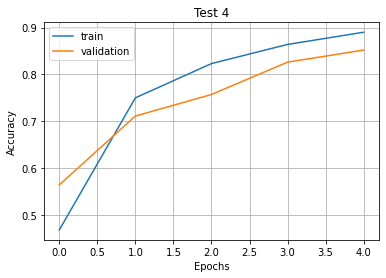

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test 4')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.grid()
plt.show()